In [ ]:
!pip install pandas numpy matplotlib scikit-learn seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 40.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 5.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 31.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 25.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 ->

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture
matplotlib.rcParams['figure.dpi'] = 300

In [ ]:
from alextools import savePlotofVector
from Dataset import dataset

In [ ]:
X_brut = dataset.X_week_derive() # on récupère les moyennes d'exposition sur la semaine

In [ ]:
X = X_brut.copy()
for x, y in np.argwhere(np.isnan(X)):
    removed_nan = X[:, y][~np.isnan(X[:, y])]
    X[x, y] = np.median(removed_nan) # on remplace les missing value par la médiane

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
data_proj = pca.fit_transform(X_scaled) # projection des données selon l'ACP
xticks = dataset.X_week_labels() # array contenant les abscisses en texte.
xticks[:4]

['L - 0H et 1H', 'L - 2H et 3H', 'L - 4H et 5H', 'L - 6H et 7H']

/tmp/ipykernel_112/4175533373.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmax' will be ignored
  ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)


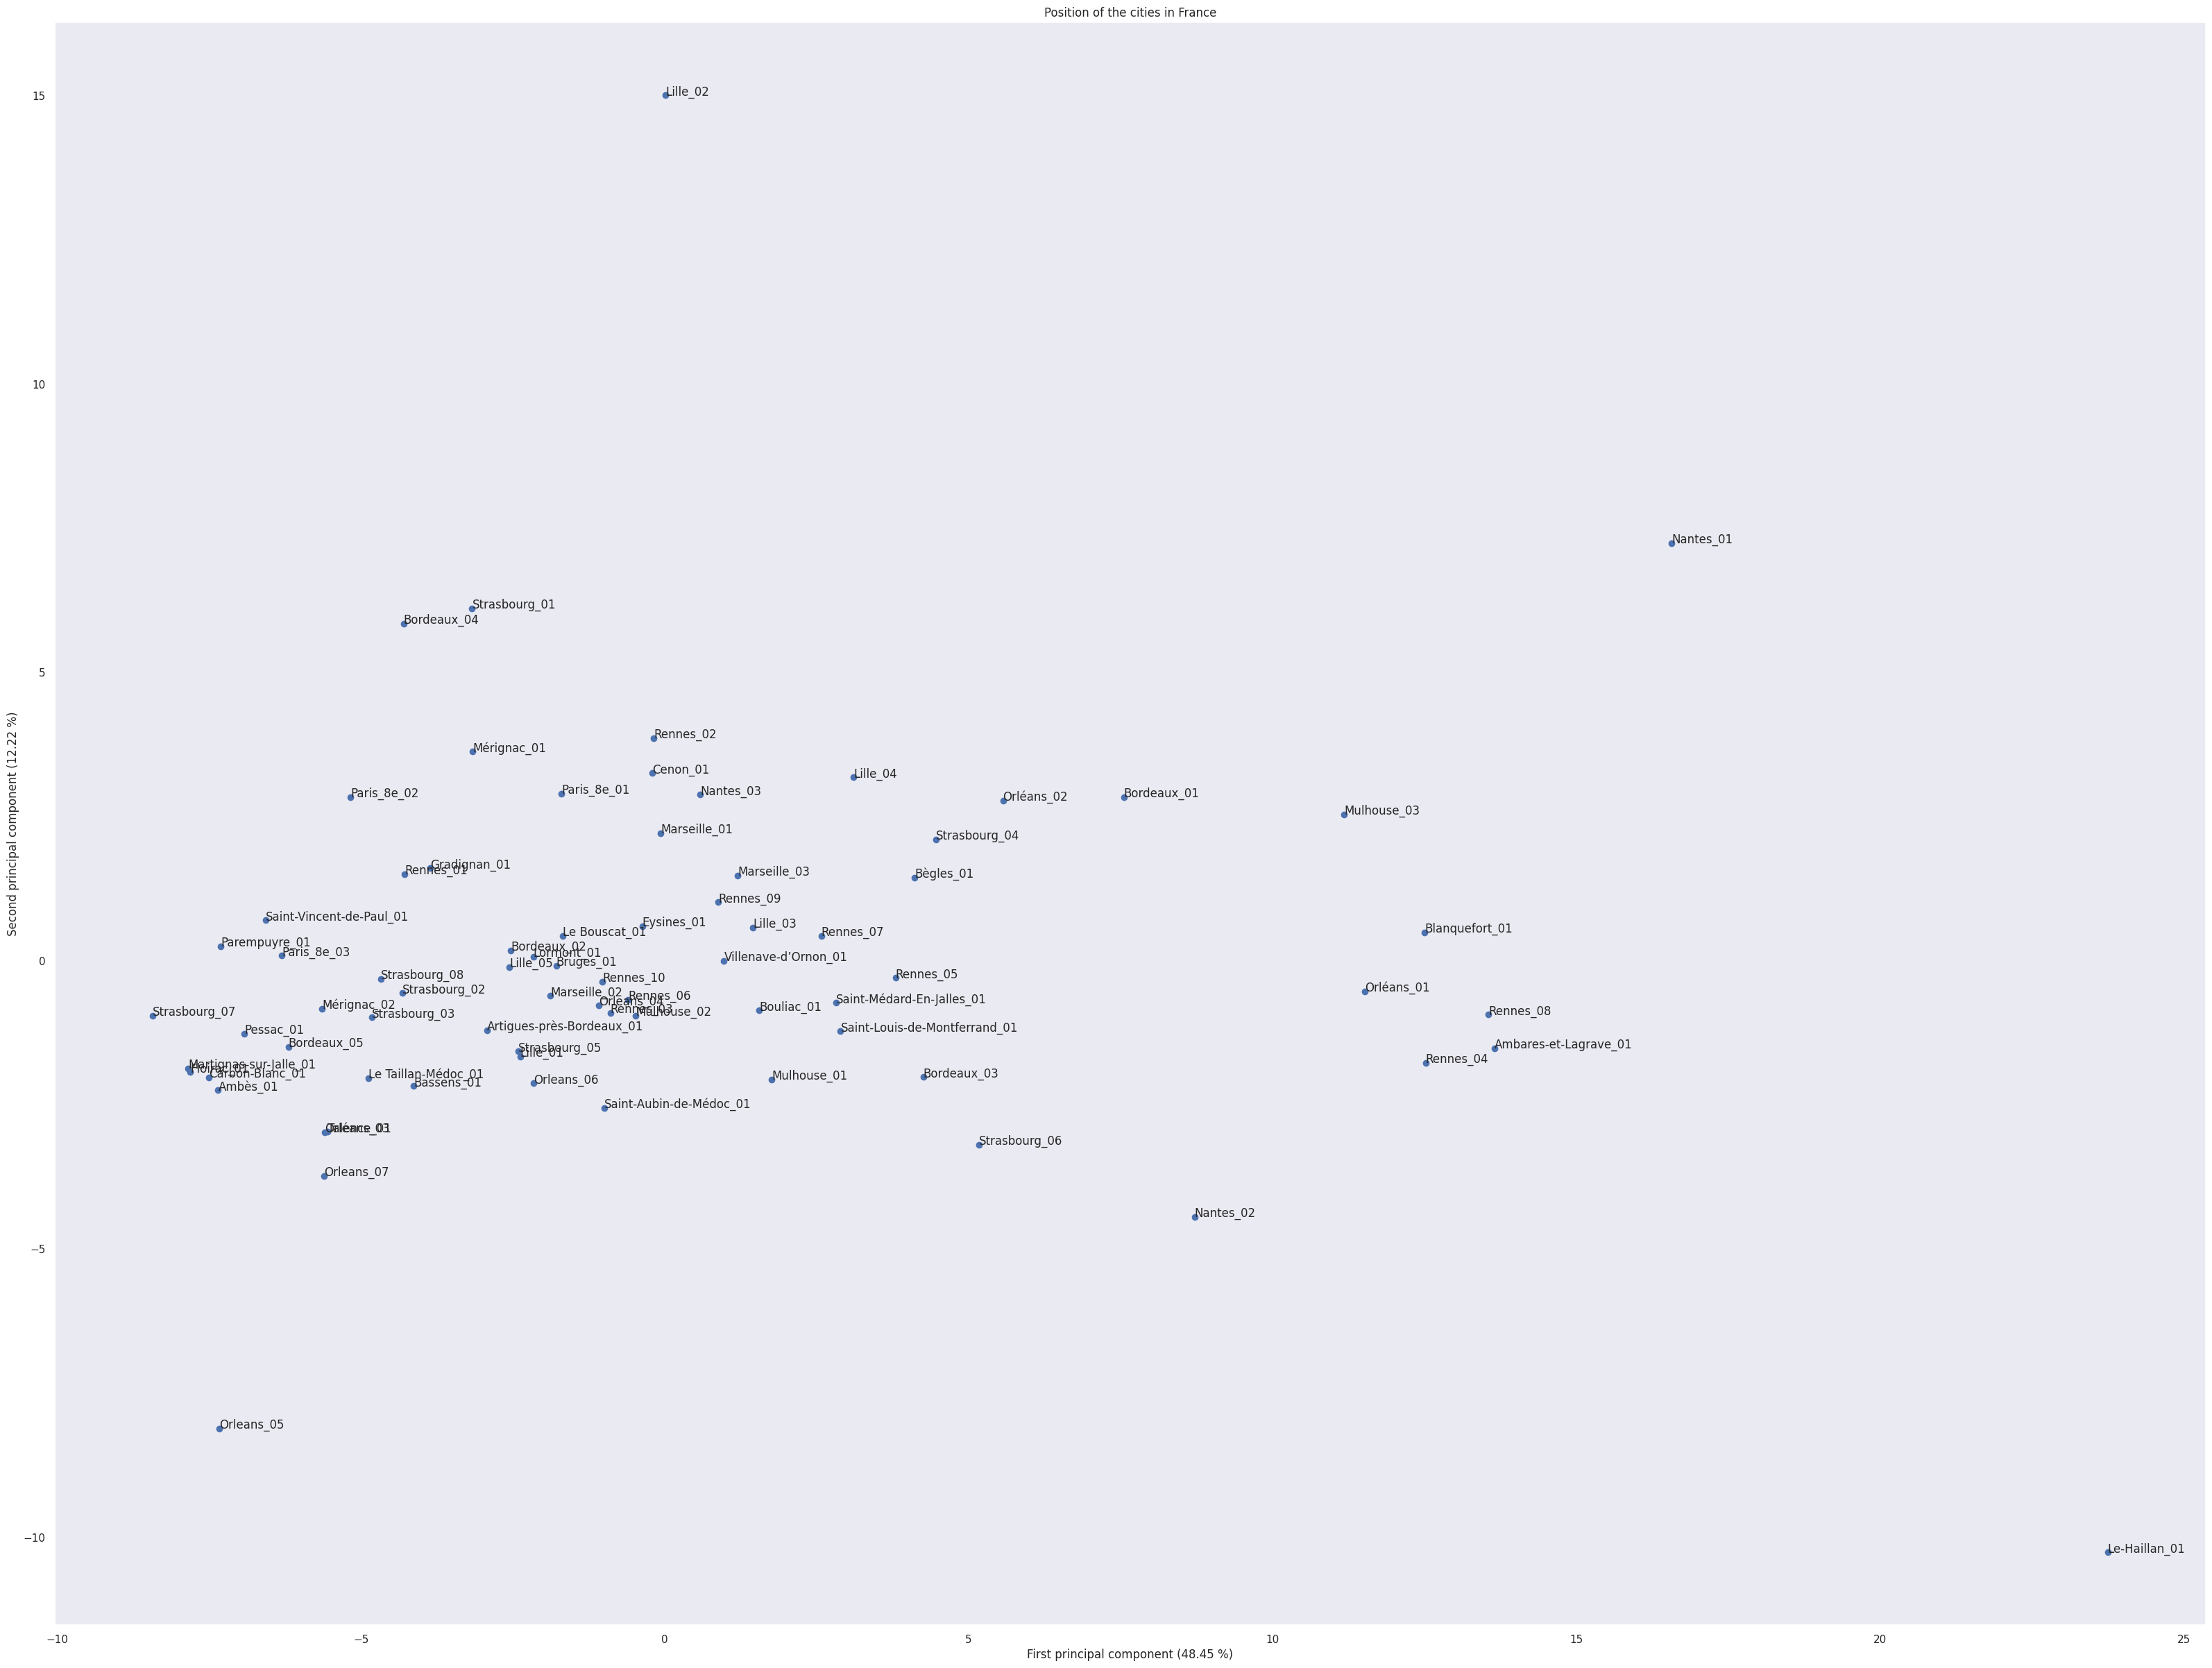

In [ ]:
if 1:
    fig, ax = plt.subplots(figsize=(40,30))
    ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)
    for i, name in enumerate(dataset.sondes_names):
        ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
    plt.grid()
    plt.xlabel(f"First principal component ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
    plt.ylabel(f"Second principal component ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
    plt.title('Position of the cities in France')


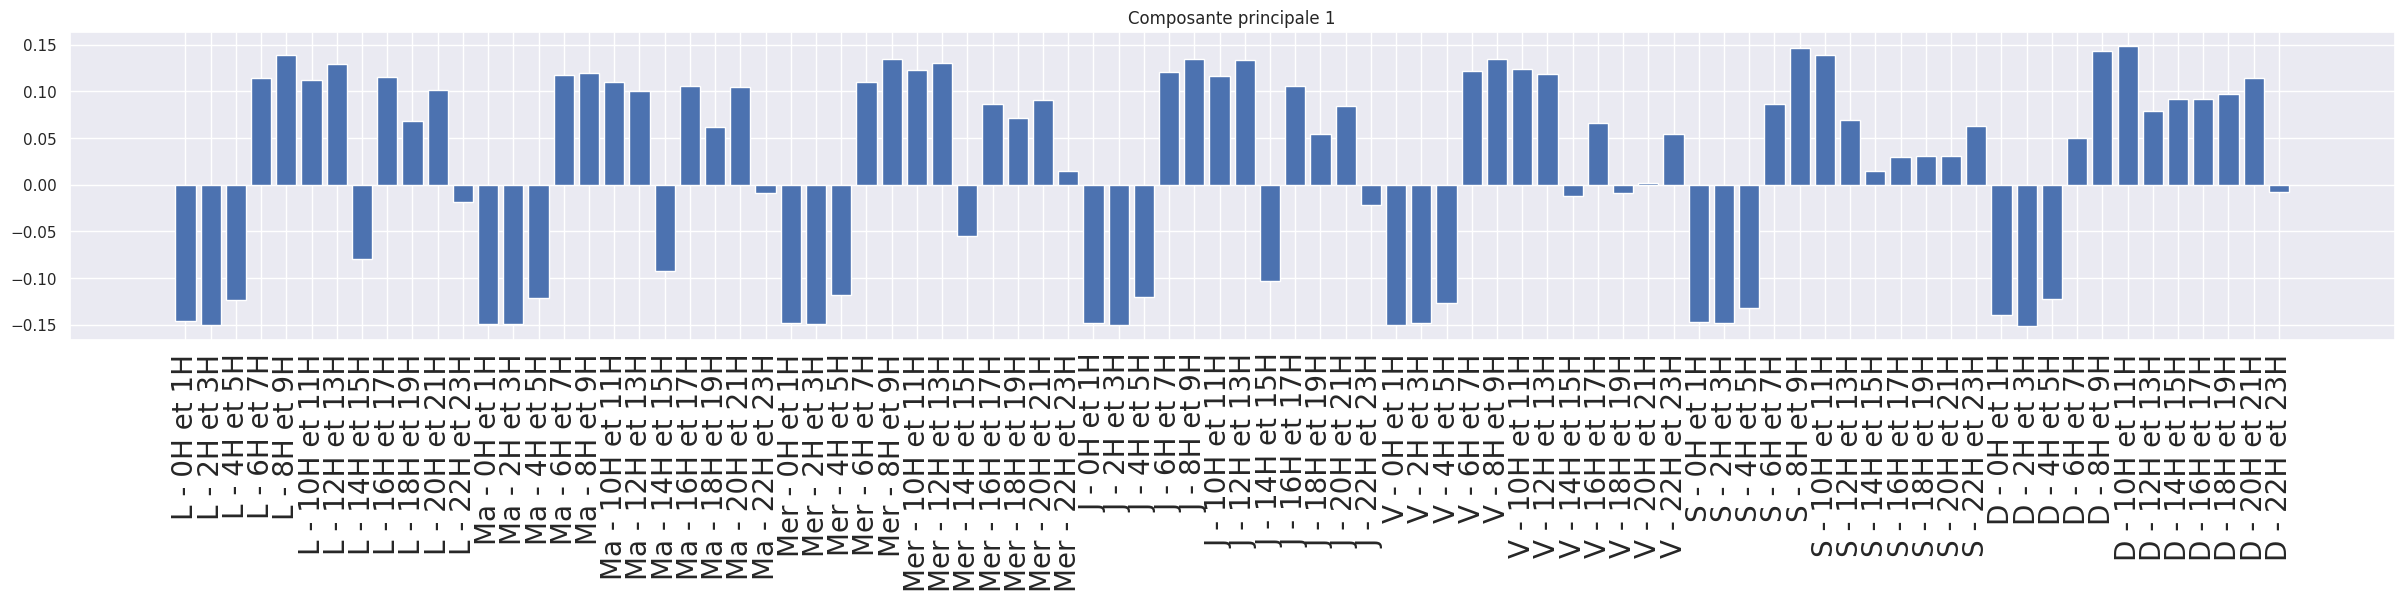

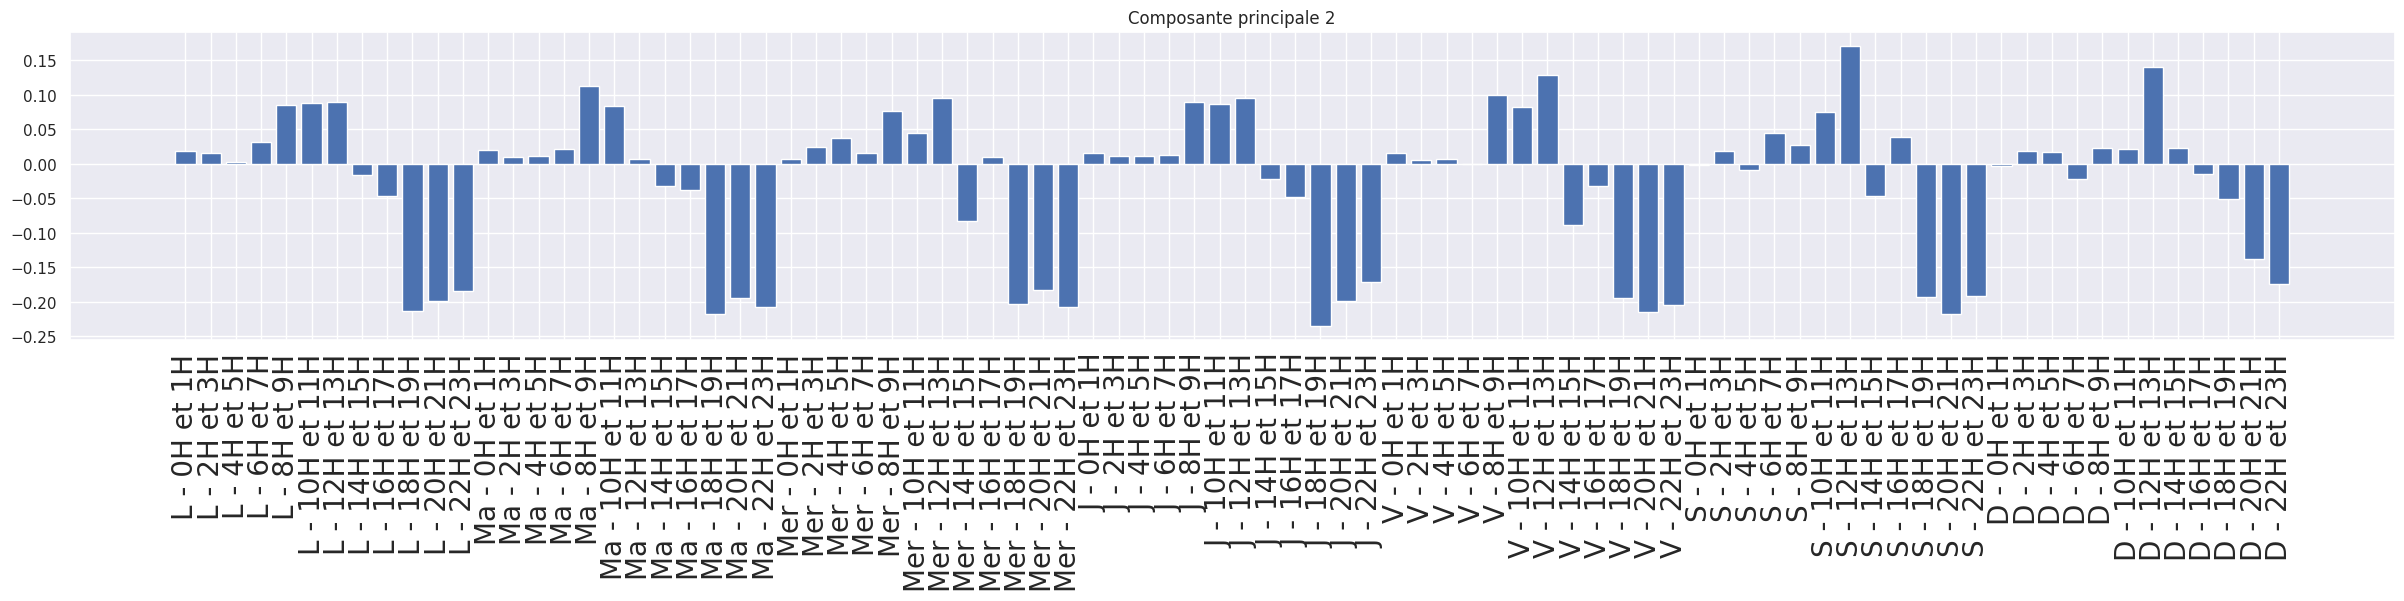

In [ ]:
for h in (0, 1):
    savePlotofVector(pca.components_[h], "", dataset, title=f"Composante principale {h+1}", color="b", save=False)
    